# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

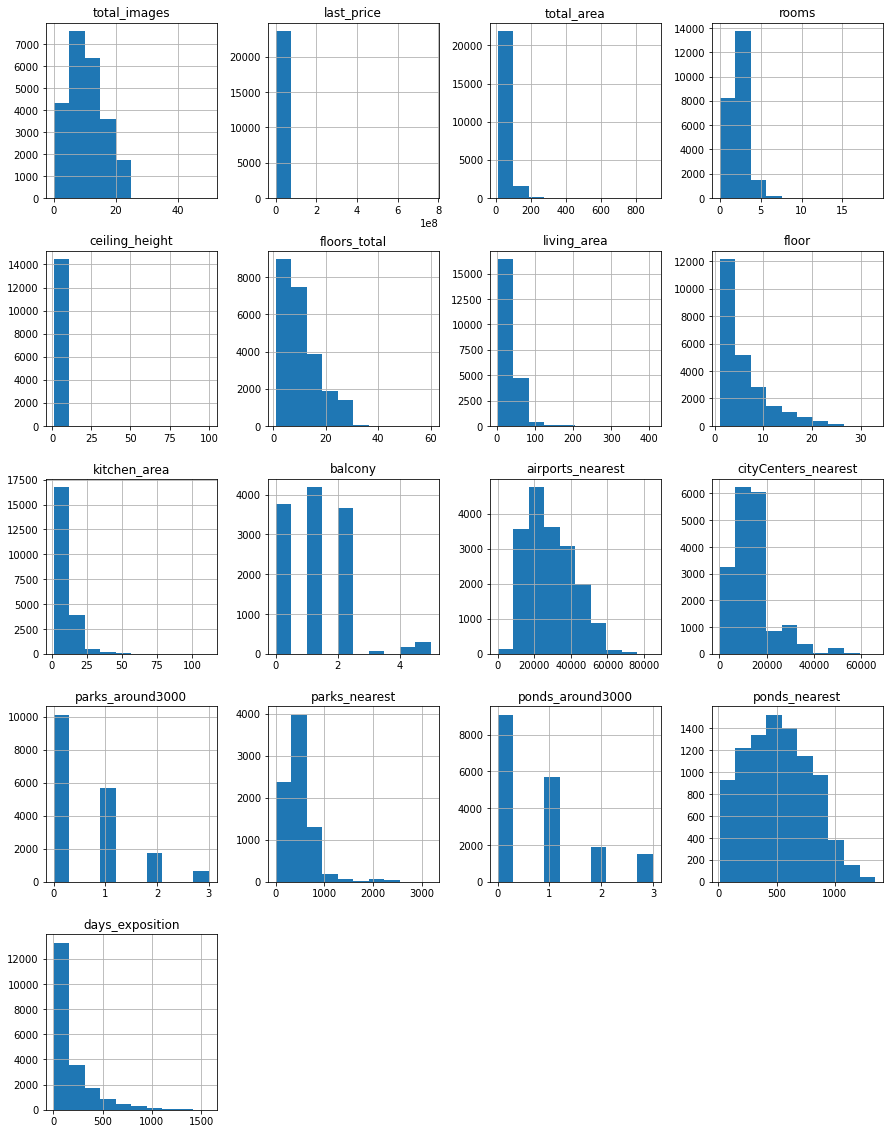

In [3]:
data.hist(figsize=(15, 20))

### Выполните предобработку данных

In [4]:
# Посмотрим на пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Столбцы имеющие пропуски и первые мысли на их счет: 
- `ceiling_height` - высота потолков. Уберем аномальные значения, пропуски заменим на медианные.
- `floors_total` - количество этажей.  Оставим как есть.
- `living_area` - жилая площадь. Заполним медианным значением, из расчета общей площади и количество комнат.
- `is_apartment` - апартаменты или нет. Если не указанов явном виде, предположим что это не аппартаменты, проставим False. 
- `kitchen_area` - площадь кухни. Оставим как есть. Но проверим, если студия, то проставим 0.
- `balcony` - площадь балкона. Предположим, что балкона нет, заменим на '0'
- `locality_name` - район не заполнен, оставим как есть.
Следующие значения, как указано в задании, заполняются автоматически. На основе этого предположим: 
- `airports_nearest` - расстояние от аэропорта. Рядом нет аэропортов, оставим как есть.
- `cityCenters_nearest` - расстояние до центра. Удаленность от центра большая, оставим как есть.
- `parks_around3000` - парки в окрестностях 3000м. Значит парков нет, оставим как есть.  
- `parks_nearest` - парки близко. Аналогично. 
- `ponds_around3000` - пруды в окрестностях 3000м. Аналогично с парками.
- `ponds_nearest` - пруды близко. Аналогично.
- `days_exposition` - сколько дней со дня выкладки прошло. Видимо объявление сохранилось как черновик и не было опубликовано. Либо технический сбой портала. По этой позиции можно составить багрепорт в будущем.


In [5]:
# посмотрим какой разброс потолков, сможем ли мы заменить средним значением.
data['ceiling_height'].value_counts()


2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

In [6]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [7]:
# Много кривых и аномальных значений. В культурной столице могут быть потолки и под 4м, но лучше посмотреть что там отображается;
data.query('(ceiling_height > 3.5) & (ceiling_height < 6)')
#data.query('ceiling_height > 6')
#data.query('ceiling_height < 2.2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000.0,80.00,2018-11-06T00:00:00,3,4.15,3.0,44.20,2,NaN,...,12.20,NaN,Санкт-Петербург,20562.0,3167.0,2.0,344.0,1.0,838.0,38.0
179,5,14800000.0,108.70,2019-04-11T00:00:00,3,4.00,5.0,72.40,5,NaN,...,8.00,NaN,Санкт-Петербург,23017.0,2559.0,1.0,559.0,0.0,NaN,NaN
368,19,12500000.0,85.00,2018-09-21T00:00:00,3,3.70,6.0,56.50,6,NaN,...,22.00,NaN,Санкт-Петербург,27084.0,5777.0,2.0,516.0,1.0,36.0,4.0
464,15,66571000.0,280.30,2015-06-11T00:00:00,6,5.20,8.0,159.50,7,NaN,...,21.10,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
635,17,25990000.0,133.90,2018-03-16T00:00:00,4,3.60,3.0,74.99,3,NaN,...,19.20,NaN,Санкт-Петербург,23843.0,2391.0,0.0,NaN,3.0,418.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23014,8,2250000.0,28.30,2017-08-04T00:00:00,1,3.70,3.0,10.90,2,NaN,...,7.30,NaN,Ломоносов,49713.0,53138.0,2.0,170.0,3.0,110.0,424.0
23330,6,19900000.0,144.00,2017-01-09T00:00:00,3,3.80,5.0,79.50,3,NaN,...,20.00,NaN,Санкт-Петербург,24705.0,4924.0,2.0,521.0,0.0,NaN,NaN
23382,2,15000000.0,150.90,2016-07-04T00:00:00,4,3.67,4.0,98.20,3,NaN,...,23.90,0.0,Санкт-Петербург,21204.0,2180.0,3.0,105.0,1.0,614.0,455.0
23573,8,6290000.0,47.67,2019-03-20T00:00:00,1,3.60,12.0,13.59,12,NaN,...,17.87,2.0,Санкт-Петербург,35726.0,16028.0,1.0,253.0,2.0,99.0,19.0


In [8]:
#На всякий случай все приведем к числам, я вижу пробелы после значений.
data['ceiling_height'] = pd.to_numeric(data['ceiling_height'], errors='coerce')


In [9]:
# Обработаем значения с высотой потолков 25-36м, и предположим что это опечатка и соотвествуют 2.5-3.6м. Посмотрим сколько их:
data.query('ceiling_height >= 25 and ceiling_height <= 36')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN
10773,8,3800000.0,58.0,2017-10-13T00:00:00,2,27.0,10.0,30.1,3,False,...,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0


In [10]:
data.loc[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 36), 'ceiling_height'] /= 10

In [11]:
#Уберем все что сильное выпадает(выше 4). Меньше 2.5 по СНиПу быть не должно.Не забываем про индексы.
data.drop(index=data.query('ceiling_height < 2.5 or ceiling_height > 4').index, inplace=True)


In [12]:
#Рассчитаем медиану и заполним пропуски. 
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

In [13]:
#Проверим
data['ceiling_height'].isna().sum()

0

#### Вывод пока такой:  
    - Очистили все что не проходил  СНиПом(меньше 2,5м) и все что выше 4м. 
    - Обработали опечатки.
    - Заполнили пропуски медианным значением. 

#### Следующее значение - floors_total :
Не так много значений, можно было бы обработать исходя из локации, но проще избавиться от них. В дальнейшем, опираясь на данные из этого столбца, мы будем расчитывать критерий первый / последний этаж.

In [14]:
# Посмотрим на пустые значенеия:
data.loc[data['floors_total'].isna()]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [15]:
#Не так много, для точности исследованиия удалим их. 
data.dropna(subset=['floors_total'], inplace=True)

In [16]:
#Проверим
data['floors_total'].isna().sum()

0

#### living_area 


In [17]:
# Cледующая колонка с пропусками:  living_area. Посмотрим на значения, где не указана площадь вообще. 
# Везде указано количество комнат, можно будет заполнить медаинным значением.
data.loc[data['living_area'].isna()]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,2.65,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [18]:
# Попробуем расчитать медианное значение для квартир с разным количеством комнат. 
# Добавим стобец 'living_ratio' - это будет коэффицентом. 
data['living_ratio'] = data['living_area'] / data['total_area']
# Теперь найдем медианный с группировкой по количеству комнат:
median_living_ratio = data.pivot_table(index='rooms', values='living_ratio', aggfunc='median')
#далее напишем функцию, которая будет принимать строчки, и если в living_area пусто, заполнять меданным значением.
def fill_living_area(row):
    if pd.isna(row['living_area']):  
        ratio = median_living_ratio.loc[row['rooms'], 'living_ratio']  
        return row['total_area'] * ratio  
    return row['living_area']  

data['living_area'] = data.apply(fill_living_area, axis=1)





In [19]:
data['living_area'].isna().sum()

0

#### is_apartment 

In [20]:
# Где не заполнено проставим False. 

In [21]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [22]:
# И приведем к типу данных bool
data['is_apartment'] = data['is_apartment'].astype('bool')

In [23]:
# Проверим
data['is_apartment'].value_counts() 

False    23439
True        45
Name: is_apartment, dtype: int64

#### kitchen_area - площадь кухни:
Кухни, конечно, бывают разные, надо сначала посмотреть на данные.



In [24]:
data['kitchen_area'].isna().sum()

2215

In [25]:
data.loc[data['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_ratio
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,100.479167,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,15.824561,2,False,...,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,26.791049,1,False,...,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,19.298246,3,False,...,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.65,13.0,22.434211,13,False,...,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18.0,19.600000,10,False,...,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0,0.483951
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,58.007331,1,False,...,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0,NaN
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,22.000000,2,False,...,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,2.65,9.0,16.885965,4,False,...,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN


In [26]:
data['kitchen_area'].unique()

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,
         7.5 ,   9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  19.  ,  12.4 ,   7.9 ,
        10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,  10.9 ,
         9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,  15.7 ,
        13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,  35.  ,
        10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,   8.9 ,
         9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,  11.2 ,
      

In [27]:
data['studio'].unique()

array([False,  True])

In [28]:
# Очевидно что если True, значит это студия. Посмотрим на эти данные.
data.loc[data['studio']==True, ['total_area','studio','kitchen_area']]

,total_area,studio,kitchen_area
144,27.00,True,NaN
440,27.11,True,NaN
608,25.00,True,NaN
697,24.10,True,NaN
716,17.00,True,NaN
...,...,...,...
22867,30.00,True,NaN
22877,28.00,True,NaN
23210,26.00,True,NaN
23554,26.00,True,NaN


In [29]:
# Если количество комнат = 0, значит это студия. В таком случае кухни в отдельном виде нет и можно заменить NaN 
# на законный 0
data.loc[data['studio'] == True, 'kitchen_area'] = data['kitchen_area'].fillna(0)

In [30]:
# Проверим сколько пропусков у нас осталось:
data['kitchen_area'].isna().sum()

2070

In [31]:
# Не сильно ситуацию исправило. Сделаем по анналогии с расчетом living_area:
# Попробуем расчитать медианное значение kitchen_area  для квартир с разным количеством комнат. 
# Добавим стобец 'kitchen_ratio' - это будет коэффицентом. 
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']



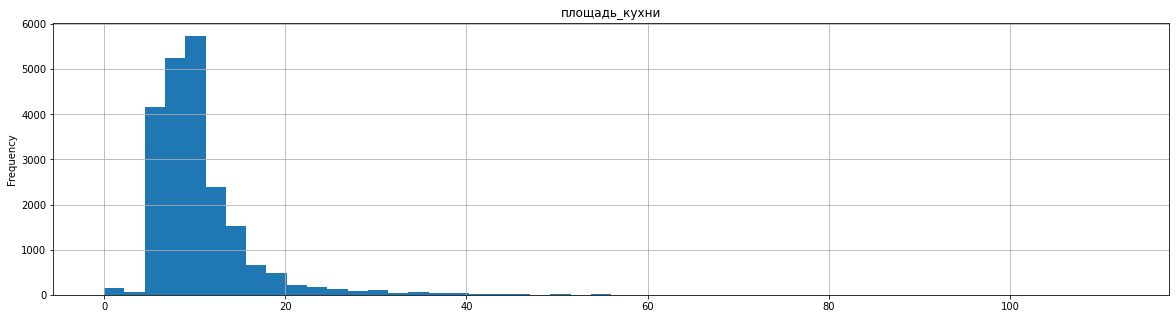

In [32]:

data['kitchen_area'].plot(kind='hist' ,title='площадь_кухни', y='площадь',bins=50,figsize=(20,5),grid=True)
plt.show()

In [33]:
# Теперь найдем медианный с группировкой по количеству комнат:
median_kitchen_ratio = data.pivot_table(index='rooms', values='kitchen_ratio', aggfunc='median')


In [34]:
#далее напишем функцию, которая будет принимать строчки, и если в kitchen_area пусто, заполнять меданным значением.
def fill_kitchen_area(row):
    if pd.isna(row['kitchen_area']):  
        ratio = median_kitchen_ratio.loc[row['rooms'], 'kitchen_ratio']  
        return row['total_area'] * ratio  
    return row['kitchen_area']  

data['kitchen_area'] = data.apply(fill_kitchen_area, axis=1)

In [35]:
data['kitchen_area'].isna().sum()

0

##### Вывод: Избавились от NaN, в одном случае проставили обоснованные нули, в другом случае проставив медианные значения. 


#### Следующий пропуск:  
Balcony. Если пользователь не заполнил площадь - значит балкона нет. Будем проставлять нули.



In [36]:
# Посмотрим сколько пропусков
data['balcony'].isna().sum()

11422

In [37]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [38]:
data['balcony'].value_counts()

1.0    4160
0.0    3698
2.0    3642
5.0     300
4.0     183
3.0      79
Name: balcony, dtype: int64

In [39]:
# Заменим NaN на 0
data['balcony'] = data['balcony'].fillna(0)

In [40]:
# Удостоверимся что все получилось
data['balcony'].isna().sum()

0

#### Следующий пропуск:  
locality_name. Посмотрим что там за позиции и можем ли мы их чем-то заменить.



In [41]:
data.loc[data['locality_name'].isna()]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_ratio,kitchen_ratio
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.800000,2,False,...,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,0.621787,0.107711
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,2.65,4.0,42.600000,2,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,0.532500,0.232500
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,2.65,24.0,15.600000,3,False,...,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,0.365340,0.250585
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,2.65,24.0,33.100000,21,False,...,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,0.530449,0.131410
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,2.65,5.0,30.800000,5,False,...,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,0.662366,0.139785
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.620000,7,False,...,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,0.442682,0.149497
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.300000,3,False,...,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0,0.653750,0.130000
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,2.65,7.0,52.451389,6,False,...,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0,NaN,NaN
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,2.65,7.0,59.100000,5,False,...,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0,0.691228,0.097076
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,2.65,24.0,20.000000,23,False,...,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0,0.666667,NaN


In [42]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [43]:
# Видим, что ест дубликаты, которые мы можем обработать: 
data.locality_name = data.locality_name.str.replace('ё', 'е') #замена буквы "ё" на "е"
data.locality_name = data.locality_name.str.replace('поселок городского типа', 'поселок') #замена на однотипные значнеия
data.locality_name = data.locality_name.str.replace('городской поселок', 'поселок') #замена на однотипные значнеия



In [44]:
# Проверим еще раз, для удобства в алфавитном порядке: 
set(data['locality_name'].unique())

{nan,
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинк

In [45]:
#Для единообразия приведем к нижнему регистру:
data['locality_name'] = data['locality_name'].str.lower()   

In [46]:
# Отлично. Посмотрим сколько незаполненных и если их не много - удалим: 
data['locality_name'].isna().sum()

48

In [47]:
# Почистим:
data = data.dropna(subset=['locality_name'])


In [48]:
# Убедимся
data['locality_name'].isna().sum()

0

In [49]:
#И посмотрим явные дубликаты:
data.duplicated().sum()

0

#### Следующие пропуски как сказано в задании заполняются автоматически. 
- airports_nearest         5542
- cityCenters_nearest      5519
- parks_around3000         5518
- parks_nearest           15620  
- ponds_around3000         5518
- ponds_nearest           14589
- days_exposition          3181



In [50]:
data.airports_nearest.describe()

count    17951.000000
mean     28807.967356
std      12642.618523
min          0.000000
25%      18551.000000
50%      26770.000000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [51]:
data['parks_around3000'].unique()



array([ 1.,  0.,  2., nan,  3.])

In [52]:
data['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

##### Очевидно, что показывает количество парков / прудов рядом. Если значение NaN => их нет. Можем заменить на 0. 


In [53]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [54]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [55]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5485
cityCenters_nearest      5465
parks_around3000            0
parks_nearest           15465
ponds_around3000            0
ponds_nearest           14455
days_exposition          3152
living_ratio             1853
kitchen_ratio            2061
dtype: int64

##### Вывод: данные формируются автоматически. Занимаю большую часть, поэтому просто удалить их нельзя. В то же время просчитать их и приблизить к реальности не представляется возможным. Поэтому оставляем их как есть. 


#### Надо переименовать cityCenters_nearest в соотвествии с общепринятой практикой


In [56]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

#### Колонку "first_day_exposition" необходимо преобразовать в datetime. Данные округлены до дней, тут сделаем анналогично. 

In [57]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [58]:
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

   #### Переведем еще несколько столбцов в другой тип данных.

##### Что мы уже поменяли: 
- first_day_exposition - date
- is_apartment - bool






##### Что еще поменяем:
- last_price - int64 нам хватит числового значения без дроби.
- floors_total, balcony - int64 - так как там тоже только числовые маленькие значения. 
- parks_around3000, ponds_around3000 - анналогично, хватит числовых, без дроби
- days_exposition так же хватит дня, а это числовое целое значение. Округлим его. 


In [59]:
data['last_price'] = data['last_price'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['days_exposition'] = round(data['days_exposition'],0)

In [60]:
# И сбросим индексацию 
data.reset_index(drop=True,inplace=True)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23436 non-null  int64         
 1   last_price            23436 non-null  int64         
 2   total_area            23436 non-null  float64       
 3   first_day_exposition  23436 non-null  datetime64[ns]
 4   rooms                 23436 non-null  int64         
 5   ceiling_height        23436 non-null  float64       
 6   floors_total          23436 non-null  int64         
 7   living_area           23436 non-null  float64       
 8   floor                 23436 non-null  int64         
 9   is_apartment          23436 non-null  bool          
 10  studio                23436 non-null  bool          
 11  open_plan             23436 non-null  bool          
 12  kitchen_area          23436 non-null  float64       
 13  balcony         

In [62]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_ratio,kitchen_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,100.479167,9,False,...,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,0.320000,0.410000


#### Избавимся от выбросов, для более точного анализа данных.

In [63]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_ratio,kitchen_ratio
count,23436.000000,2.343600e+04,23436.000000,23436.00000,23436.000000,23436.000000,23436.000000,23436.000000,23436.000000,23436.000000,17951.000000,17971.00000,23436.000000,7971.000000,23436.000000,8981.000000,20284.000000,21583.000000,21375.000000
mean,9.879160,6.499071e+06,60.185120,2.06874,2.694366,10.695554,34.589853,5.885134,10.384187,0.593062,28807.967356,14209.74086,0.467401,490.709698,0.589264,518.369001,180.564829,0.564703,0.186172
std,5.678732,1.075086e+07,35.069524,1.07663,0.204147,6.597841,22.469903,4.876992,5.829147,0.959963,12642.618523,8610.18075,0.747033,342.289763,0.883392,278.182676,219.602556,0.105267,0.074350
min,0.000000,1.219000e+04,12.000000,0.00000,2.500000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.00000,0.000000,1.000000,0.000000,13.000000,1.000000,0.021583,0.000000
25%,6.000000,3.418750e+06,40.000000,1.00000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,18551.000000,9267.00000,0.000000,288.000000,0.000000,293.000000,45.000000,0.495078,0.133078
50%,9.000000,4.645000e+06,52.000000,2.00000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26770.000000,13108.00000,0.000000,454.000000,0.000000,503.000000,95.000000,0.567823,0.171875
75%,14.000000,6.760000e+06,69.632500,3.00000,2.700000,16.000000,42.300000,8.000000,11.715000,1.000000,37294.000000,16293.00000,1.000000,612.000000,1.000000,731.000000,231.000000,0.637728,0.231653
max,50.000000,7.630000e+08,900.000000,19.00000,4.000000,60.000000,428.617838,33.000000,122.457061,5.000000,84869.000000,65968.00000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.000000,0.787879


Пойдем по всем значениям:
- total_images ничего лишнего вроде.
- last_price - надо посмотреть визуально. 
- total_area - явно есть выбросы, посмотрим детально.
- rooms - 19 комнат, кажется перебором - посмотрим детально.
- ceiling_height - это значение мы уже обработали. 
- floors_total - дома бывают разные, тут можно оставить как есть. 
- living_area - есть явные выбросы, посмотрим детально. 
-  floor - оставим как есть.
- kitchen_area - какие-то странные значения, надо посмотреть внимательнее. 
- balcony - тут все кажется вполне нормальным. 
-  airports_nearest, city_centers_nearest, parks_nearest, ponds_nearest - эти значения автоматические, пока не придумал как их обрабатывать. 
- parks_around3000, ponds_around3000 - эти значения мы недавно обработали, все кажется адекватным
- days_exposition - есть выбросы. Но убирать их не стоит. 



**UPD: Почитав задание, я понял что в дальнейшем буду этим заниматься**

In [64]:
# Посмотрим какие значения далеко от центра.
#data.loc[data['city_centers_nearest'].isna(), 'locality_name'].unique()


In [65]:
# Даже позиции с локацией Санкт-Петербург имеют пропуски в значениях расстояние от центра. 
#data.loc[(data['locality_name'] == 'санкт-петербург') & data['city_centers_nearest'].isna()]

In [66]:
# Анналогично с аэропортом. У нас нет формата адреса 
#data.loc[(data['locality_name'] == 'санкт-петербург') & data['airports_nearest'].isna()]

### Добавьте в таблицу новые столбцы

#### Добавим стоимость квардратного метра

In [67]:
data['price_per_square_meter'] = data['last_price']/data['total_area']


In [68]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_ratio,kitchen_ratio,price_per_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,18863.0,16028.0,1,482.0,2,755.0,NaN,0.472222,0.231481,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,12817.0,18603.0,0,NaN,0,NaN,81.0,0.460396,0.272277,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558.0,0.612500,0.148214,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.65,14,100.479167,9,False,...,28098.0,6800.0,2,84.0,3,234.0,424.0,NaN,NaN,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121.0,0.320000,0.410000,100000.000000


In [69]:
# Максимальная цена за квадрат
print('Максимальная цена за квадрат:', data.price_per_square_meter.max())
# Средняя цена за квадрат
print('Средняя цена за квадрат:', data.price_per_square_meter.mean())
# Медианная цена за квадрат
print('Медианная цена за квадрат:', data.price_per_square_meter.median())
# Минимальная цена за квадрат
print('Минимальная цена за квадрат:', data.price_per_square_meter.min())

Максимальная цена за квадрат: 1907500.0
Средняя цена за квадрат: 99295.30324318113
Медианная цена за квадрат: 95000.0
Минимальная цена за квадрат: 111.8348623853211


#### День недели, месяц, год публикации.

In [70]:
data['day_of_the_week_exposition'] = data['first_day_exposition'].dt.dayofweek

In [71]:
data['month_of_the_week_exposition'] = data['first_day_exposition'].dt.month

In [72]:
data['year_of_the_week_exposition'] = data['first_day_exposition'].dt.year

In [73]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_ratio,kitchen_ratio,price_per_square_meter,day_of_the_week_exposition,month_of_the_week_exposition,year_of_the_week_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2,755.0,NaN,0.472222,0.231481,120370.370370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,NaN,0,NaN,81.0,0.460396,0.272277,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,90.0,2,574.0,558.0,0.612500,0.148214,92785.714286,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,100.479167,9,False,...,84.0,3,234.0,424.0,NaN,NaN,408176.100629,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1,48.0,121.0,0.320000,0.410000,100000.000000,1,6,2018


##### Все планово отработало, можем двигаться дальше.

#### Определим тип этажа квартиры там, где это возможно.


In [74]:
# Напишем функцию, которая будет принимать строчку и на основании данных формировать новый столбец:
def type_of_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [75]:
# Применим функцию к новосозданному столбцу: 
data['type_of_floor'] = data.apply(type_of_floor, axis=1)

In [76]:
#Посмотрим как вышло:
data.query('type_of_floor == "последний"').head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_ratio,kitchen_ratio,price_per_square_meter,day_of_the_week_exposition,month_of_the_week_exposition,year_of_the_week_exposition,type_of_floor
12,10,3890000,54.0,2016-06-30,2,2.65,5,30.000000,5,False,...,0,NaN,90.0,0.555556,0.166667,72037.037037,3,6,2016,последний
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.000000,5,False,...,3,298.0,366.0,0.630841,0.121495,82943.925234,5,7,2017,последний
23,11,2950000,32.0,2016-10-29,1,2.60,9,17.700000,9,False,...,1,190.0,615.0,0.553125,0.190625,92187.500000,5,10,2016,последний
36,13,3790000,45.0,2017-01-25,2,2.65,9,27.000000,9,False,...,0,NaN,139.0,0.600000,0.140000,84222.222222,2,1,2017,последний
43,13,9330000,48.0,2017-01-10,2,3.00,4,28.000000,4,False,...,1,492.0,763.0,0.583333,0.156250,194375.000000,1,1,2017,последний
52,20,11795000,136.0,2017-09-22,6,3.00,2,94.000000,2,False,...,0,NaN,NaN,0.691176,0.080882,86727.941176,4,9,2017,последний
59,15,6300000,46.5,2017-03-06,1,2.65,13,22.434211,13,False,...,0,NaN,336.0,NaN,NaN,135483.870968,0,3,2017,последний
61,18,7990000,74.0,2017-08-24,2,2.65,4,43.000000,4,False,...,0,NaN,609.0,0.581081,0.270270,107972.972973,3,8,2017,последний
64,13,3100000,44.3,2017-11-07,2,2.50,5,29.000000,5,False,...,0,NaN,143.0,0.654628,0.119639,69977.426637,1,11,2017,последний
69,6,4010000,50.7,2018-09-16,2,2.60,5,28.900000,5,False,...,0,NaN,194.0,0.570020,0.177515,79092.702170,6,9,2018,последний


#### Осталось найти расстояние до центра там, где это возможно. 

In [77]:
# На самом деле оно у нас есть, надо просто перевести его в киллометры. 
data['city_centers_nearest_at_km'] = round(data['city_centers_nearest'] / 1000, 0)

In [78]:
# Посмотрим
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,living_ratio,kitchen_ratio,price_per_square_meter,day_of_the_week_exposition,month_of_the_week_exposition,year_of_the_week_exposition,type_of_floor,city_centers_nearest_at_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,755.0,NaN,0.472222,0.231481,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,NaN,81.0,0.460396,0.272277,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,574.0,558.0,0.612500,0.148214,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,100.479167,9,False,...,234.0,424.0,NaN,NaN,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,48.0,121.0,0.320000,0.410000,100000.000000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

##### Пойдем по порядку: общая площадь; total_area 

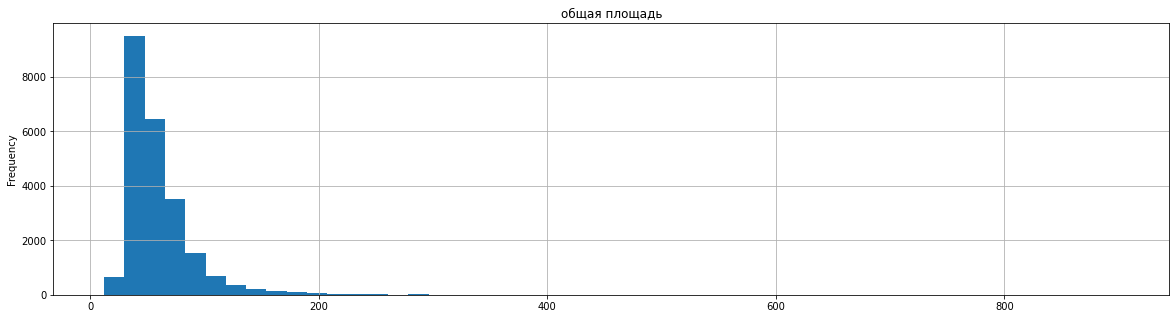

In [79]:
#Посмотрим по гистограмме
data['total_area'].plot(kind='hist' ,title='общая площадь', y='total_area',bins=50,figsize=(20,5),grid=True)
plt.show()

In [80]:
##### В целом видно, что распределение нормальное. Обратимся к данным еще раз и после сокорректируем.
data['total_area'].describe()

count    23436.000000
mean        60.185120
std         35.069524
min         12.000000
25%         40.000000
50%         52.000000
75%         69.632500
max        900.000000
Name: total_area, dtype: float64

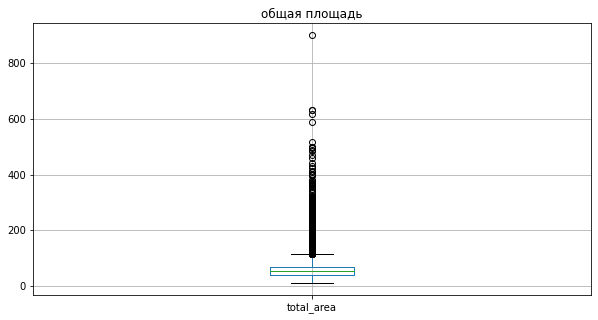

In [81]:
# Видим большой разрыв между третьим квартилем и максимумом.Посмотрим на диаграмму распределения. 
data.plot(kind='box' ,title='общая площадь', y='total_area',figsize=(10,5),grid=True)
plt.show()

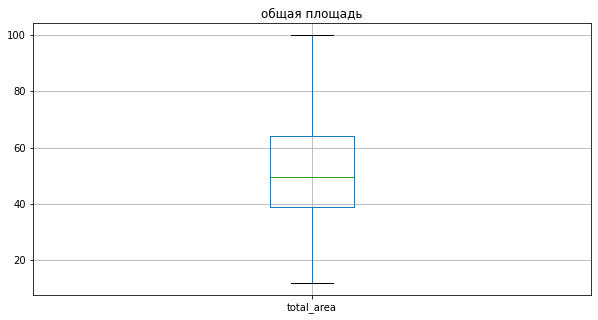

In [82]:
#Как видно, все что выше ~120 это выбросы. Сделаем срез на основе этой гипотезы. 
# + По общей площади минимальных ограничений нет,по жилой срежем позже. 
data.query('total_area < 100').plot(kind='box' ,title='общая площадь', y='total_area',figsize=(10,5),grid=True)
plt.show()

In [83]:
# Немного поигравшись зо значениями делаю вывод, что все что выше 100кв.м можем срезать:
data = data.query('total_area < 100')


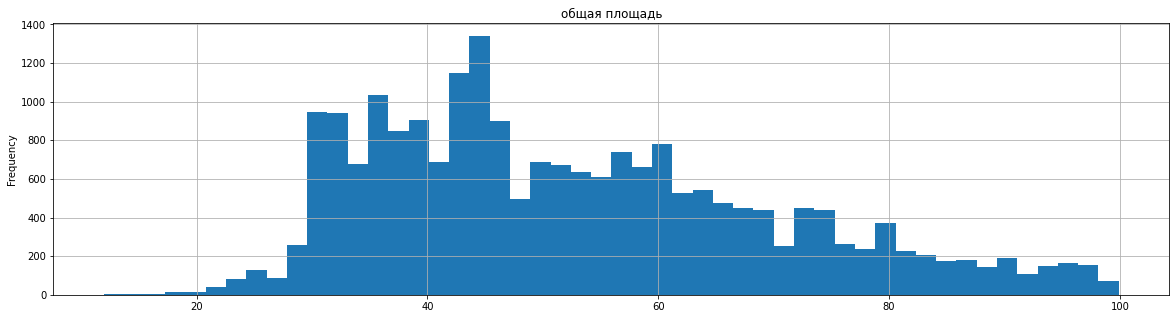

In [84]:
data['total_area'].plot(kind='hist' ,title='общая площадь', y='total_area',bins=50,figsize=(20,5),grid=True)
plt.show()

###### Вывод: это уже похоже на нормальное распределение. Есть рывок после 30 кв.м., это обусловлено тем, что квартиры меньше этой квадратуры раньше вообще не строились и только сейчас стали появляться на рынке.  Все что выше 100 квадратов - скорей всего принадлежит к люкс сегменту и для наших расчетов не подойдет.

##### жилая площадь, living_area

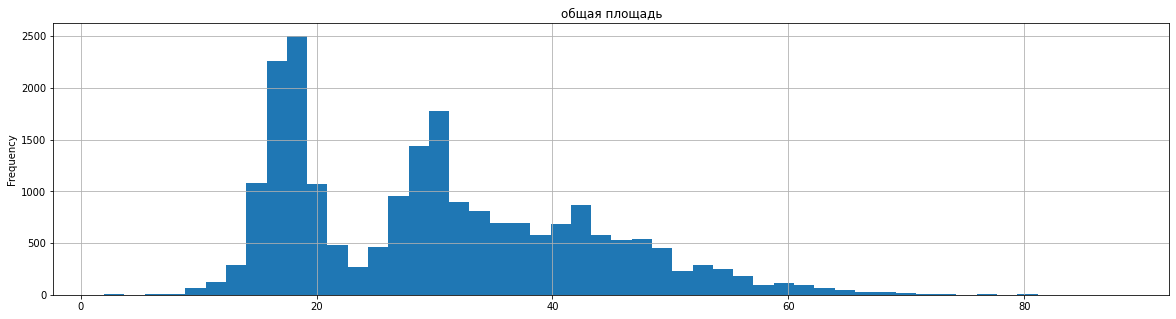

In [85]:
data['living_area'].plot(kind='hist' ,title='общая площадь', y='living_area',bins=50,figsize=(20,5),grid=True)
plt.show()

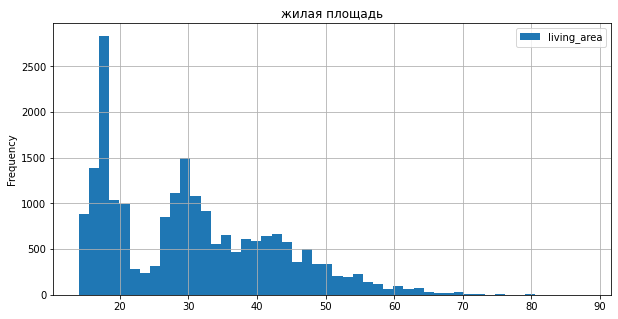

In [86]:
#Сделаем срез,но уже с 14(По СНиП) и до 100: 
data.query('living_area > 14 & living_area < 100').plot(kind='hist' ,title='жилая площадь', y='living_area',bins=50,figsize=(10,5),grid=True)
plt.show()

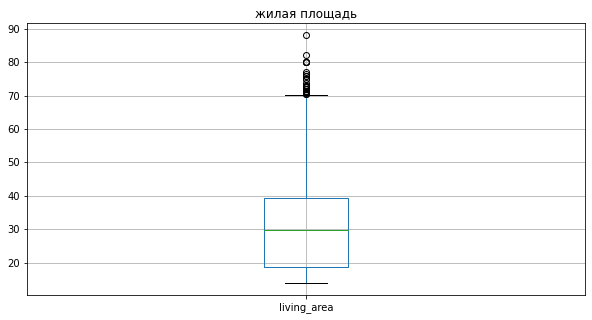

In [87]:
# Посмотрим диаграмму распределения:
data.query('living_area > 14 & living_area < 100').plot(kind='box' ,title='жилая площадь', y='living_area',figsize=(10,5),grid=True)
plt.show()

In [88]:
# Расчеты верны, срезаем в продакшн.
data = data.query('living_area > 14') 

##### площадь кухни; kitchen_area

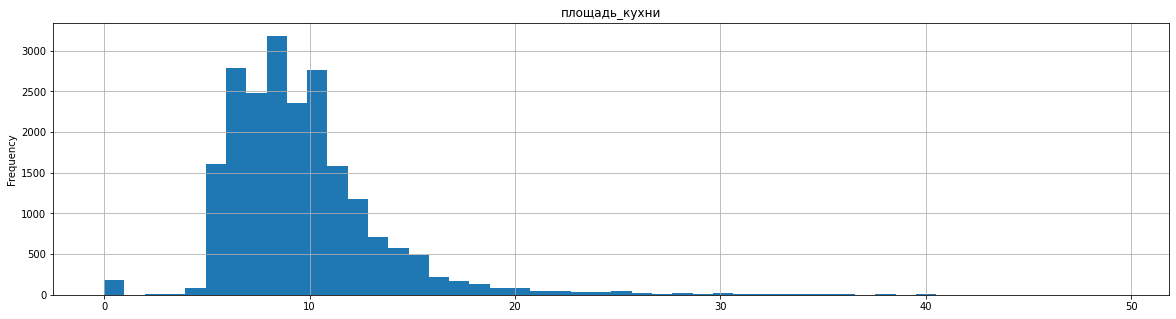

In [89]:
data['kitchen_area'].plot(kind='hist' ,title='площадь_кухни', y='kitchen_area',bins=50,figsize=(20,5),grid=True)
plt.show()

###### Площадь кухни я обрабатывал ранее в 2.6.  Небольшое количество студий присутствует в графике, где кухни нет как таковой. Можно визуально предположить, что график похож на распределение Пуассона, но в нашем отношении нет времени. Поэтому это все же ближе к нормальному распределению, если бы не хвост. Посмотрим на диаграмму распределения:

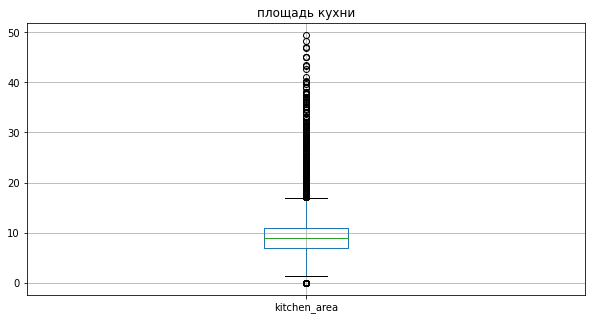

In [90]:
data['kitchen_area'].plot(kind='box' ,title='площадь кухни', y='total_area',figsize=(10,5),grid=True)
plt.show()

In [91]:
# Выбросы ближе к нулю оставим, так как у нас есть студии. Все выбросы выше 20кв. м. срезаем.
data = data.query('kitchen_area < 20') 

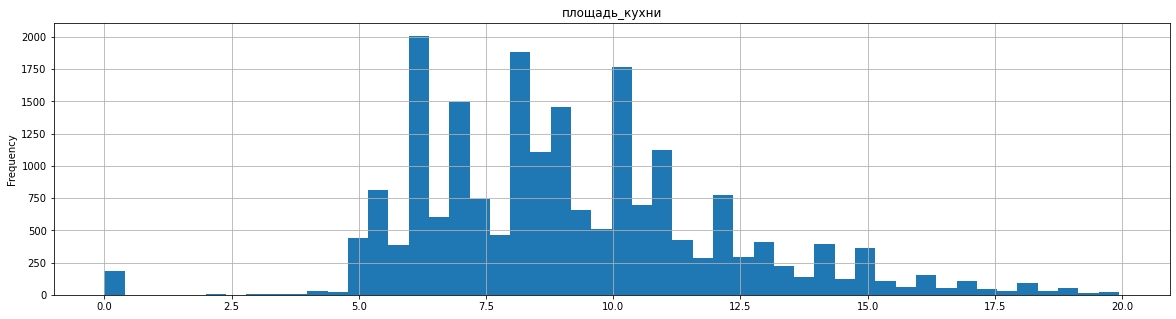

In [92]:
data['kitchen_area'].plot(kind='hist' ,title='площадь_кухни', y='kitchen_area',bins=50,figsize=(20,5),grid=True)
plt.show()

###### Вывод: похоже на правду. По скачкам есть предположение, что стройка имеет все же типажность и определенные планировки более распространныены. Примерно так же пока не популярны и студии у которых кухня = 0. 

#### Цена объекта - last_price. 

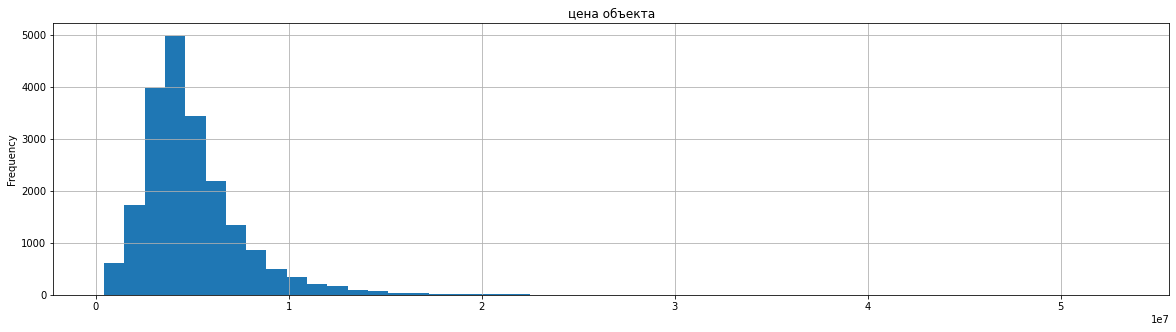

In [93]:
data['last_price'].plot(kind='hist' ,title='цена объекта', y='last_price',bins=50,figsize=(20,5),grid=True)
plt.show()

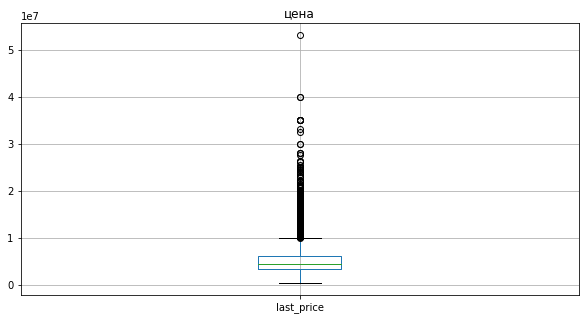

In [94]:
data['last_price'].plot(kind='box' ,title='цена', y='last_price',figsize=(10,5),grid=True)
plt.show()

###### Все что выще 1e7 (10млн). срезаем, это явные выбросы и в процессе оценки не пригодится. 

In [95]:
data = data.query('last_price < 10000000') 

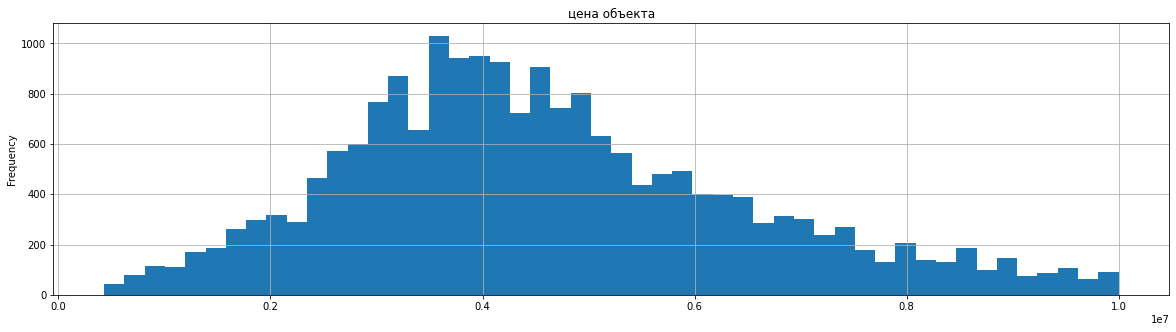

In [96]:
data['last_price'].plot(kind='hist' ,title='цена объекта', y='last_price',bins=50,figsize=(20,5),grid=True)
plt.show()

###### Это уже похоже на нормальное распределение. 


##### rooms 

In [97]:
# Тут я уже прикинул, что делаю одно и то же, поэтому надо обобщить. 
column = ['rooms','ceiling_height','floors_total','city_centers_nearest','parks_nearest']

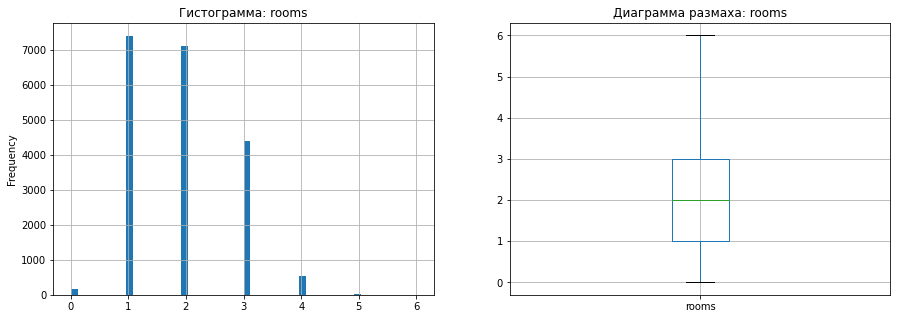

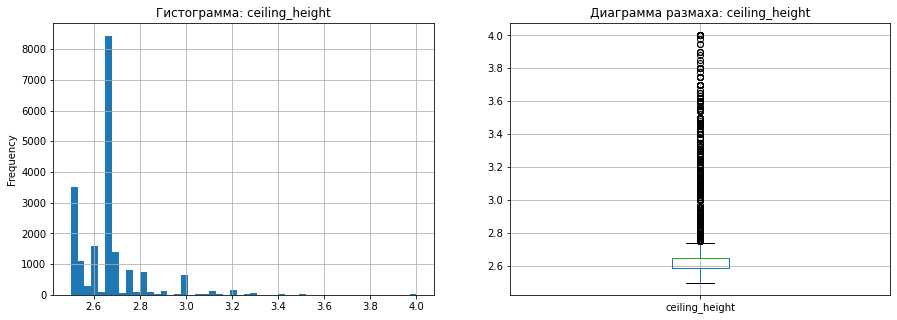

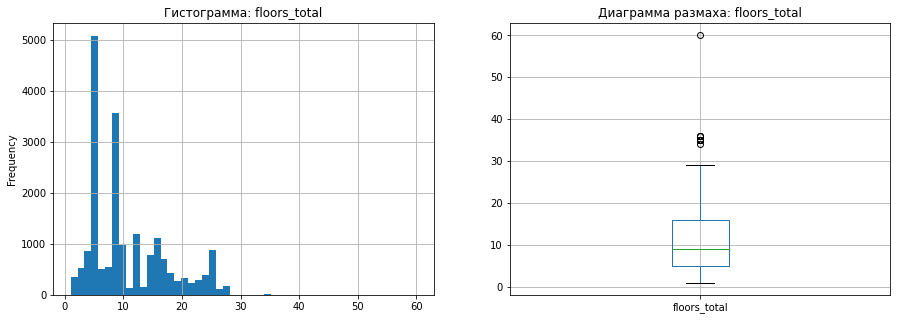

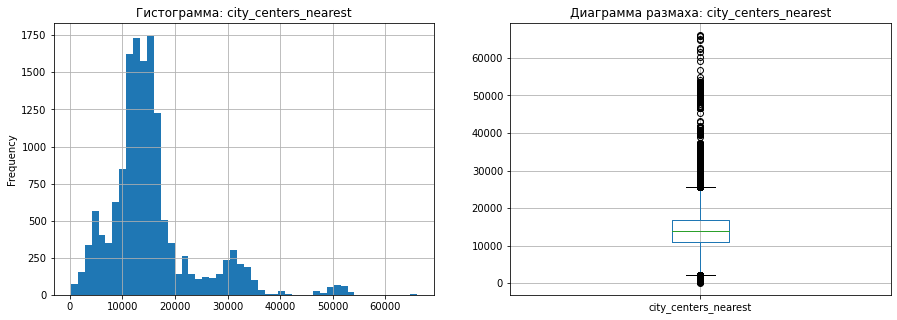

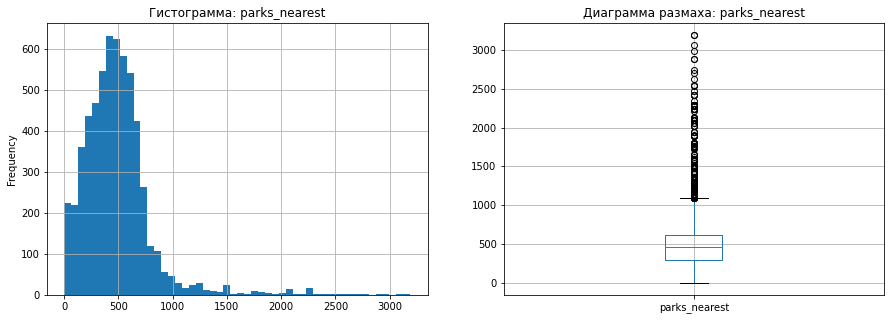

In [98]:
for col in column:
    plt.figure(figsize=(15, 5))

    # Гистограмма
    plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, 1-й график
    data[col].plot(kind='hist', bins=50, grid=True)
    plt.title(f'Гистограмма: {col}')
    
    # Диаграмма размаха
    plt.subplot(1, 2, 2)  # 1 строка, 2 столбца, 2-й график
    data[col].plot(kind='box', grid=True)
    plt.title(f'Диаграмма размаха: {col}')
    
    plt.show()

<AxesSubplot:>

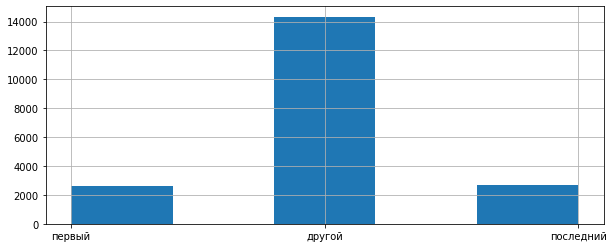

In [99]:
# Так как тут текстовое значение, в общий цикл не попало значение.
data['type_of_floor'].hist(bins=5, grid=True, figsize=(10,4))

##### Пойдем по порядку: 
- 'rooms' - распределение нормальное, ничего срезать не будем: однушки, двушки, чуть меньше трешек. Совсем чуть чуть 4к и еще меньше студий. Похоже на правду.
- 'ceiling_height' - С потолками веселей, мы уже срезали аномалии, подкорректировали очепятки. Все что выше 2.7 показывает нам график что выбросы, но здравый смысл, знание архитектуры Санкт-Петербурга и данные Консалтингового центра «Петербургская Недвижимость» : "высота потолков в новостройках Петербурга варьируется от 2,65 до 3,5" дают мне власть оставить данные не тронутыми. 
- 'floors_total' - "Оставим как есть" - была моя первая реакция, однако  одноэтажные многоквартирные дома - это что-то сложно-представляемое. Скорее это частные дома опубликованные под видом квартир. Их не много, но лучше срезать. 
- 'city_centers_nearest' & 'parks_nearest' объединю в одно: локации разные. Удаленность от центра и парков возможна любая. Поэтому эти данные я оставлю как есть. 
- 'type_of_floor' - тут тоже все оставляем как есть. Гистограмма, кстати, показывает нормальное распределение)

In [100]:
# Срезаем все, что меньше 2х. 
data = data.query('floors_total > 1')

#### Посмотрим как быстро продавались квартиры.

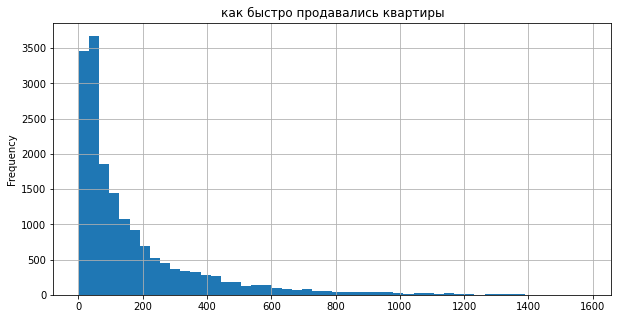

In [101]:
data['days_exposition'].plot(kind='hist' ,title='как быстро продавались квартиры', y='days_exposition',bins=50,figsize=(10,5),grid=True)
plt.show()

##### А вот тут мы видим распределение Пуассона! Посчитаем медиану и среднее:

In [102]:
#Среднее
data['days_exposition'].mean()

169.59753771458298

In [103]:
#Медиана
data['days_exposition'].median()

90.0

##### Среднее от медианы отличается почти в два раза. Видим огромны хвост после 200 дней. Подозреваю что там либо объявления, которые забыли убрать и они протухли или невыдгодные. Так как сегмент люкс мы ранее отсекли. В будущем неплохо бы иметь какой-то чекбокс, что объявление обновляется. Попробуем посмотреть на диаграмму распределения и отсечь выбросы:


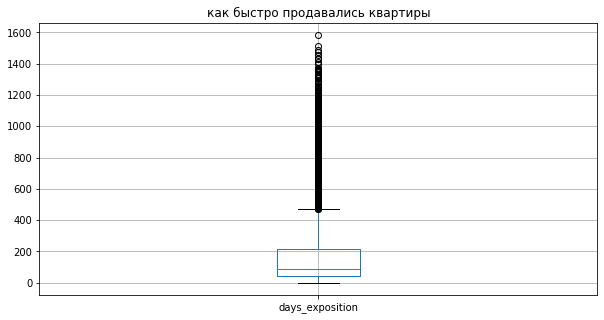

In [104]:
data['days_exposition'].plot(kind='box' ,title='как быстро продавались квартиры', y='days_exposition',figsize=(10,5),grid=True)
plt.show()

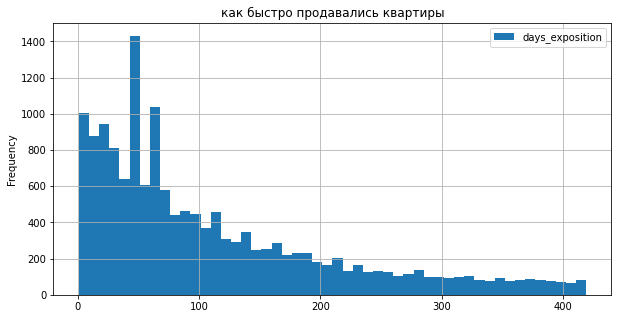

In [105]:
# Так, все что выше ~ 420 можем отсечь, явные выбросы. И посмотреть еще раз:
data.query('days_exposition < 420').plot(kind='hist' ,title='как быстро продавались квартиры', y='days_exposition',bins=50,figsize=(10,5),grid=True)
plt.show()

In [106]:
# И проверим среднее и медиану при таких значениях:
data.query('days_exposition < 420')['days_exposition'].median()




74.0

In [107]:
data.query('days_exposition < 420')['days_exposition'].mean()

111.35865770076296

In [108]:
data.query('days_exposition < 420')['days_exposition'].describe()

count    15466.000000
mean       111.358658
std        100.952247
min          1.000000
25%         37.000000
50%         74.000000
75%        161.000000
max        419.000000
Name: days_exposition, dtype: float64

##### Вижу большое значение в районе 50. Основываяся на вышеописанных данных, все что в среднем продается за 74 дня, все что быстрее - быстрая продажа. Все  что более - долгие. Все что выше 161 дня - необычайно долгие. 


#### Изучим что больше всего влияет на общую (полную) стоимость объекта.


Нам нужны следующие колонки:
- общая площадь;
- жилая площади;
- площадь кухни;
- количество комнат;
- этаж, на котором расположена квартира (первый, последний, другой);
- дата размещения (день недели, месяц, год)

In [109]:
#соберем список, кроме type_of_floor. Так как там три текстовых значения.
columns= ['total_area','living_area', 'kitchen_area','rooms','day_of_the_week_exposition',\
          'month_of_the_week_exposition','year_of_the_week_exposition']

корреляция цены с total_area равна 0.647


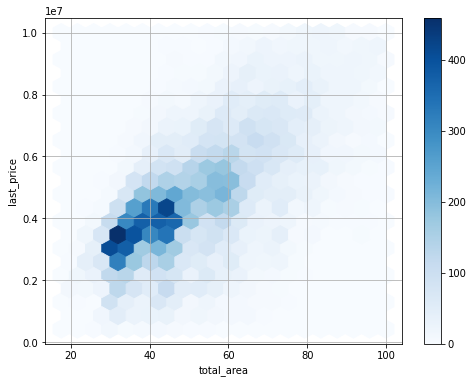

корреляция цены с living_area равна 0.524


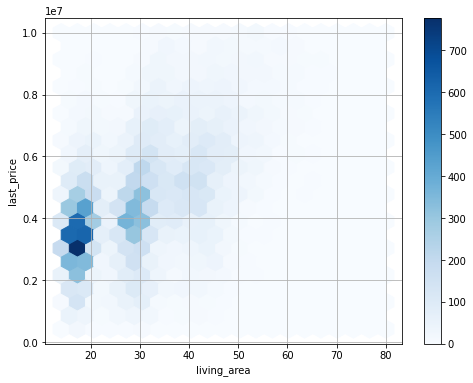

корреляция цены с kitchen_area равна 0.455


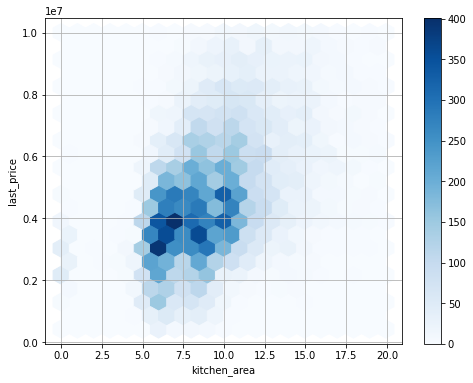

корреляция цены с rooms равна 0.4


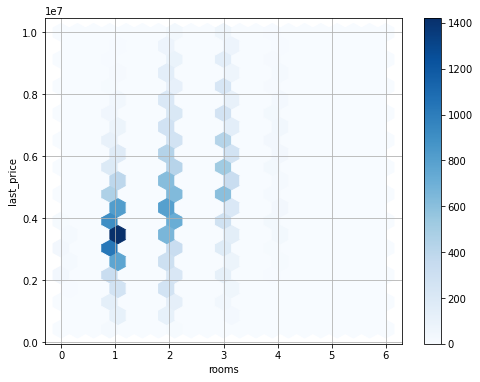

корреляция цены с day_of_the_week_exposition равна -0.017


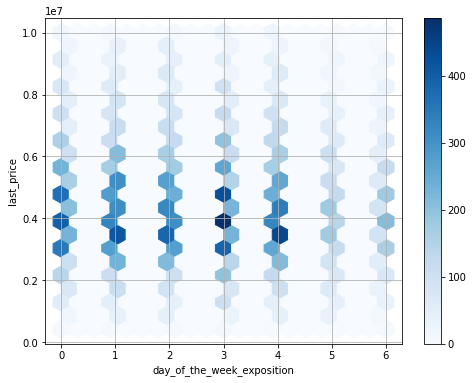

корреляция цены с month_of_the_week_exposition равна 0.003


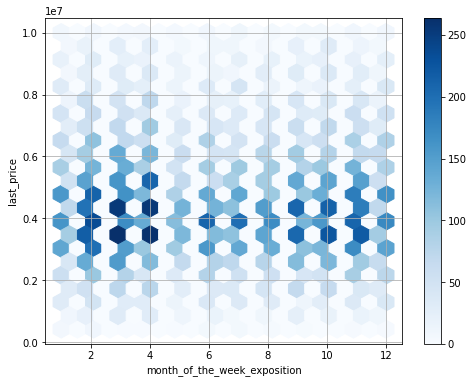

корреляция цены с year_of_the_week_exposition равна 0.018


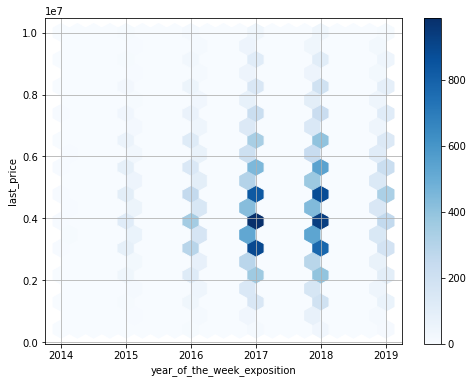

In [110]:
for i in columns:
    corr = data['last_price'].corr(data[i])
    print(f'корреляция цены с {i} равна {round(corr,3)}')
    data.plot(kind='hexbin', x=i, y='last_price', gridsize=20, figsize=(8, 6), sharex=False, grid=True, cmap='Blues')
    plt.show()

##### Первый промежуточный вывод: Самая большая и положительная корреляция между площадью и ценой. Там коэффицент Пирсона составил 0.647 . Далее жилая, площадь кухни и количество комнат. НО - все эти велечины связаны между собой: не может быть жилая площадь больше общей. Так же у значений 
- количество комнат;
- этаж, на котором расположена квартира (первый, последний, другой);
- дата размещения (день недели, месяц, год)

Линейные хорошо фиксируемые параметры. Поэтому в их случае мы построем гистограмму, это будет боле наглядно:


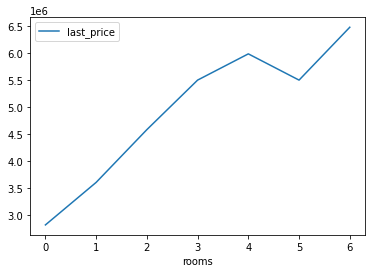

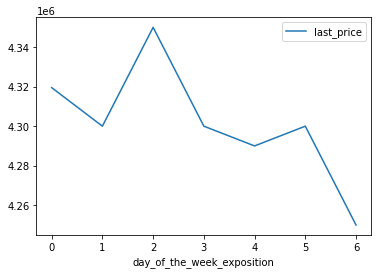

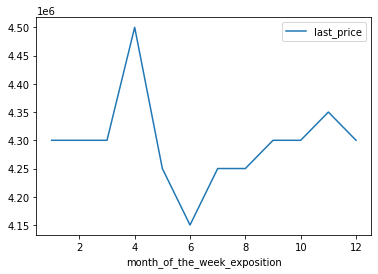

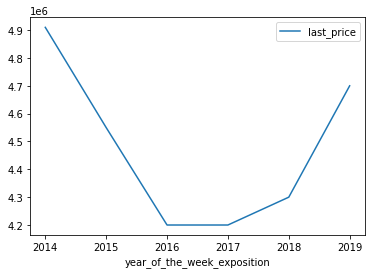

In [111]:
for i in ['rooms','day_of_the_week_exposition','month_of_the_week_exposition','year_of_the_week_exposition' ]:
    data.pivot_table(index=i,values='last_price',aggfunc='median').plot(y='last_price',style='-');

In [112]:
# Создадим новый столбец, что бы получить числовое значение корреляции.
data['type_of_floor_int'] = data['type_of_floor'].replace({'первый': 0, 'последний': 1, 'другой': 2})


In [113]:
data['last_price'].corr(data['type_of_floor_int'])

0.1574682099725922

<AxesSubplot:xlabel='type_of_floor_int', ylabel='last_price'>

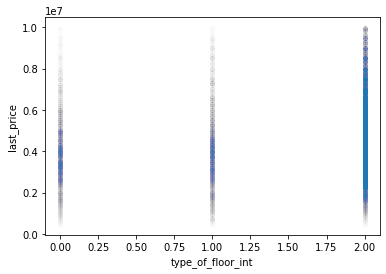

In [114]:
data.plot(x='type_of_floor_int', y='last_price', kind='scatter', alpha=0.003) 

##### Есть небольшая положительная корреляция связанная с этажностью. Так же на диаграмме отчетливо видно, что первый этаж (значение 0) - не так много предложений и они дешевле. Чуть лучше дело обстоит с последним(значение 1). И значительно больше в значении 'другие'(на диаграмме имеет значение 2)

##### Общий вывод по факторам влияющим на стоиомость: Мы видим самую большую позитиввную корреляцию между общей площадью и ценой.  Так как от общей площади зависят и все остальные площади(кухни, жилая), а так же количество комнат, то эти факторы тоже имеют положительный коэффицент корреляции, но не такой ощутимый. Этаж, день, месяц и год выкладки объявления никак не корррелируют с ценой.


#### Переходим к расчету среднего кв.м. в топ10 населенных пунктов. 

In [115]:
# Соберем сводную таблицу по населенным пунктам. Используем ранее посчитанное значение - цену за квадратный метр.
pivot = data.pivot_table(
    index='locality_name',
    values='price_per_square_meter',
    aggfunc=['count', 'mean', 'median']
)

pivot

,count,mean,median
,price_per_square_meter,price_per_square_meter,price_per_square_meter
locality_name,,,
бокситогорск,15,17457.330124,17222.222222
волосово,35,40617.135287,40000.000000
волхов,108,35107.572429,34926.710098
всеволожск,369,66489.938404,65454.545455
выборг,212,57748.956222,58001.422475
...,...,...,...
сосновый бор,80,74905.698279,74209.124209
сясьстрой,22,34080.810871,34782.608696


In [116]:
# Выведем 10 самых популярных по количеству предлложений
top10 = pivot.sort_values(('count', 'price_per_square_meter'), ascending=False).head(10)
top10

,count,mean,median
,price_per_square_meter,price_per_square_meter,price_per_square_meter
locality_name,,,
санкт-петербург,12282,104185.798709,101190.476190
поселок мурино,511,85272.197153,84968.750000
поселок шушары,407,77561.308635,75757.575758
всеволожск,369,66489.938404,65454.545455
колпино,325,75249.915300,74722.222222
пушкин,311,99481.159792,97457.627119
гатчина,294,68838.944110,67860.569236
поселок парголово,293,89669.157433,90837.282780


In [117]:
# Избавимся от мультииндекса
top10.columns = ['count', 'mean', 'median']

In [118]:
top10 = top10.reset_index()

In [119]:
top10.sort_values (by='median', ascending=False)

,locality_name,count,mean,median
0,санкт-петербург,12282,104185.798709,101190.476190
5,пушкин,311,99481.159792,97457.627119
8,деревня кудрово,273,92537.199497,92089.728453
7,поселок парголово,293,89669.157433,90837.282780
1,поселок мурино,511,85272.197153,84968.750000
2,поселок шушары,407,77561.308635,75757.575758
4,колпино,325,75249.915300,74722.222222
6,гатчина,294,68838.944110,67860.569236
3,всеволожск,369,66489.938404,65454.545455
9,выборг,212,57748.956222,58001.422475


##### Вывод: Самая большая цена за квадратный метр в Санкт-Петербурге, самая низкая - в выборге. 

#### Последнее что мы посчитаем: вычислим среднюю цену каждого километра в Санкт-Петербурге. 

<AxesSubplot:xlabel='city_centers_nearest_at_km'>

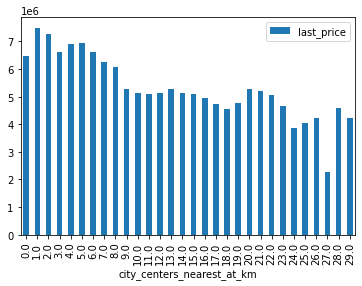

In [120]:
# Отфильтруем по локации, соберем по ранее посчитатнному киллометражу, отобразим на графике:
(
    data[data['locality_name']=='санкт-петербург']
    .pivot_table(
        index='city_centers_nearest_at_km',
        values='last_price',
        aggfunc='mean')
    .plot(kind='bar')
)


##### Вывод: 
Видим общую тенденцию, что чем дальше - тем дешевле. 
Но так же видим что в самом центре - чуть дешевле, чем в 1-7км от него. Так же видим, что на 27-ом большое проседание по цене. 
Но не забываем, что мы отсекли весь люксовый сегмент + весь сегмент выше 100кв.м. И в нашей выборке только усредненные значения. 

### Напишите общий вывод

В проекте был проведён анализ данных сервиса Яндекс Недвижимость — архива объявлений о продаже квартир в Санкт-Петербурге и близлежащих населённых пунктах за несколько лет.

Была выполнена предобработка данных, включая оптимизацию типов данных и заполнение пропусков там, где это имело смысл.

Пропуски в данных о высоте потолков были заменены медианными значениями, были обработаны опечатки и убраны явные аномалии.

Пропуски об этажности удалены, так как составляили незначительный процент. 

Для заполнения пропусков по жилой площади была написана функция , заполняющая жилую помощь в соответсвии с медиманным значением для такого же плана по количеству комнат квартире.

Для площади кухни использовалось медианное значение, в случае если это не студия.

Пропуски по признаку апартаментов, количеству балконов, наличию парков и прудов поблизости заменены: False и нули соответсвенно.

Пропуски расстояний, которые заполняются автоматически - не заполнены, так как нет достоверных данных. 

Был проведён анализ локаций, устранив неявные и явные дубликаты в данных.

В таблицу были добавлены новые столбцы, в соответствии с задачей. 

В процессе предобработки были удалены выбросы, для более точной оценки: 
- квартиры площадью больше 100кв.м. и меньше 14
- Квартиры стоимостью больше 10 000 000 
- Квартиры в одноэтажных домах
- объявления со сроком выкладки более 420 дней. 

В ходе исследования были выявлены определённые особенности и зависимости, характерные для рынка недвижимости региона:
- Самая большая положительная корреляция цены с общей площадью
- Есть небольшая положительная корреляция связанная с этажностью.Первый этаж - не так много предложений и они дешевле. Чуть лучше дело обстоит с последним. И значительно больше в значении 'другие' и цена на них выше. 
- Из топ 10 регионов по количеству объявлений: Самая большая цена за квадратный метр в Санкт-Петербурге, самая низкая - в Выборге. 
- Что касается гипотезы про стоимость квадратного метра ближе / дальше от центра : Видим общую тенденцию, что чем дальше - тем дешевле. Но так же видим что в самом центре - чуть дешевле, чем в 1-7км от него. Так же видим, что на 27-ом большое проседание по цене. Но не забываем, что мы отсекли весь люксовый сегмент + весь сегмент выше 100кв.м. И в нашей выборке только усредненные значения. Поэтому тут однозначный вывод делать нельз

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.